In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_aero = pd.read_csv('aerofit_treadmill.csv')

In [5]:
df_aero

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Problem Statement and Analysing basic metrics 

In [4]:
# Shape of data
df_aero.shape

(180, 9)

we have 180 rows and 9 attributes in the dataset.

In [7]:
# Data types
df_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


6 attributes are numerical and 3 are categorical.

# Non Graphical Analysis


In [8]:
df_aero.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations:
- There are no missing values
- Unique Products: 3
- KP281 is the most frequent product with frequency 80 
- Mean Age of a person is 28.7 and min age is 18 and max age is 38.
- Every customer have min education of 12 years and mean education of 15.5 years.
- out of 180 customers, 104 are males and 76 are females.
- 60% of the customers are married.
- Income and Miles have very high standard deviation, which means data is spread out.(May have outliers)


In [11]:
print(df_aero['Product'].unique())

['KP281' 'KP481' 'KP781']


These are 3 products in the dataset.

In [7]:
# Missing values
df_aero.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

We have zero missing values in the dataset.

In [8]:
# unique attributes
df_aero.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Income has most of the no of unique values where as gender has least no of unique values 

In [9]:
df_aero.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: cou

Here is a unique thing abut the product KP781 i.e, it is only purchased by the married people and with high income.

# Visual Analysis

## Univariate Analysis

Understanding the distribution of each attribute
  - Age
  - Education
  - Usage
  - Fitness
  - Income
  - Miles

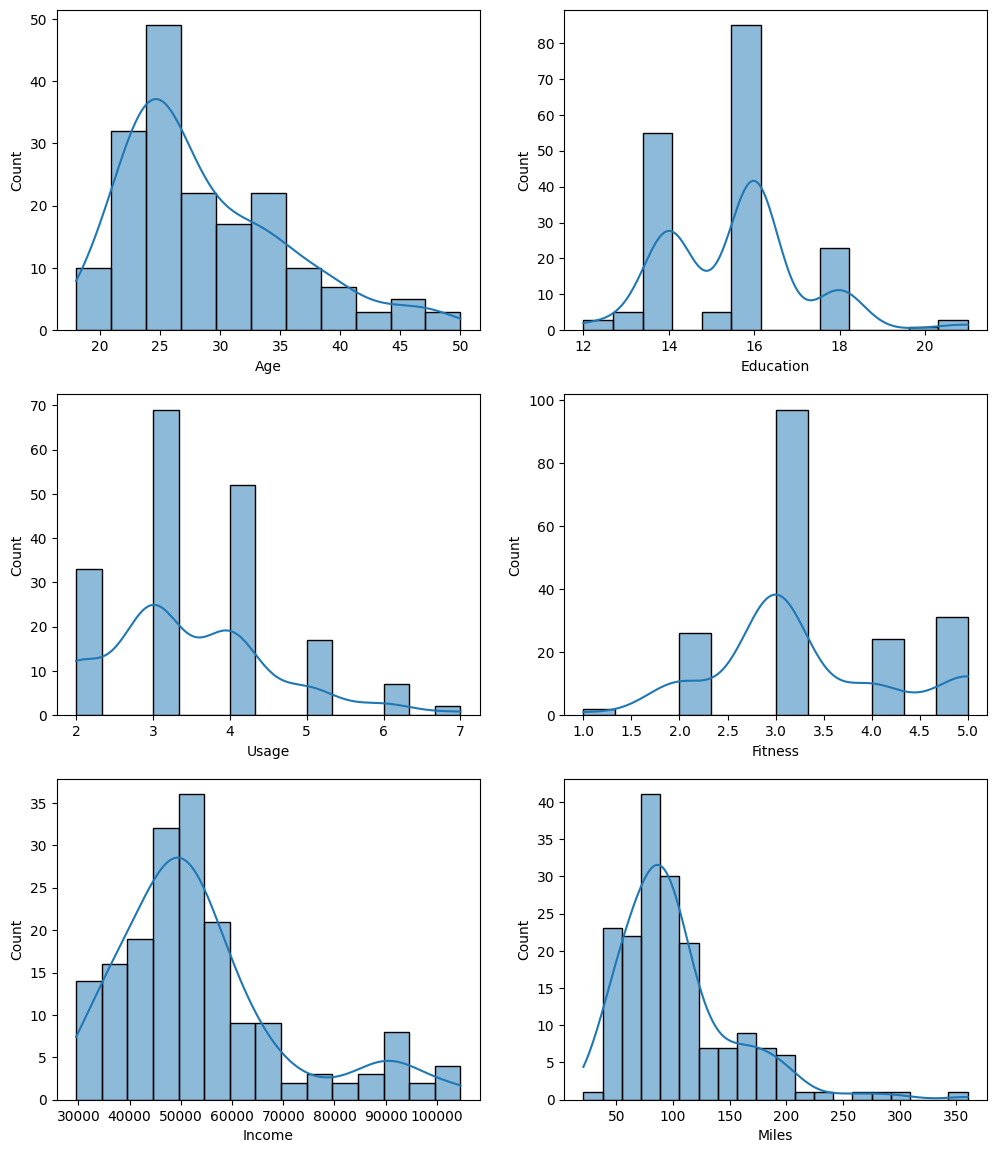

In [16]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_aero, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df_aero, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df_aero, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df_aero, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df_aero, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df_aero, x="Miles", kde=True, ax=axis[2,1])
plt.show()

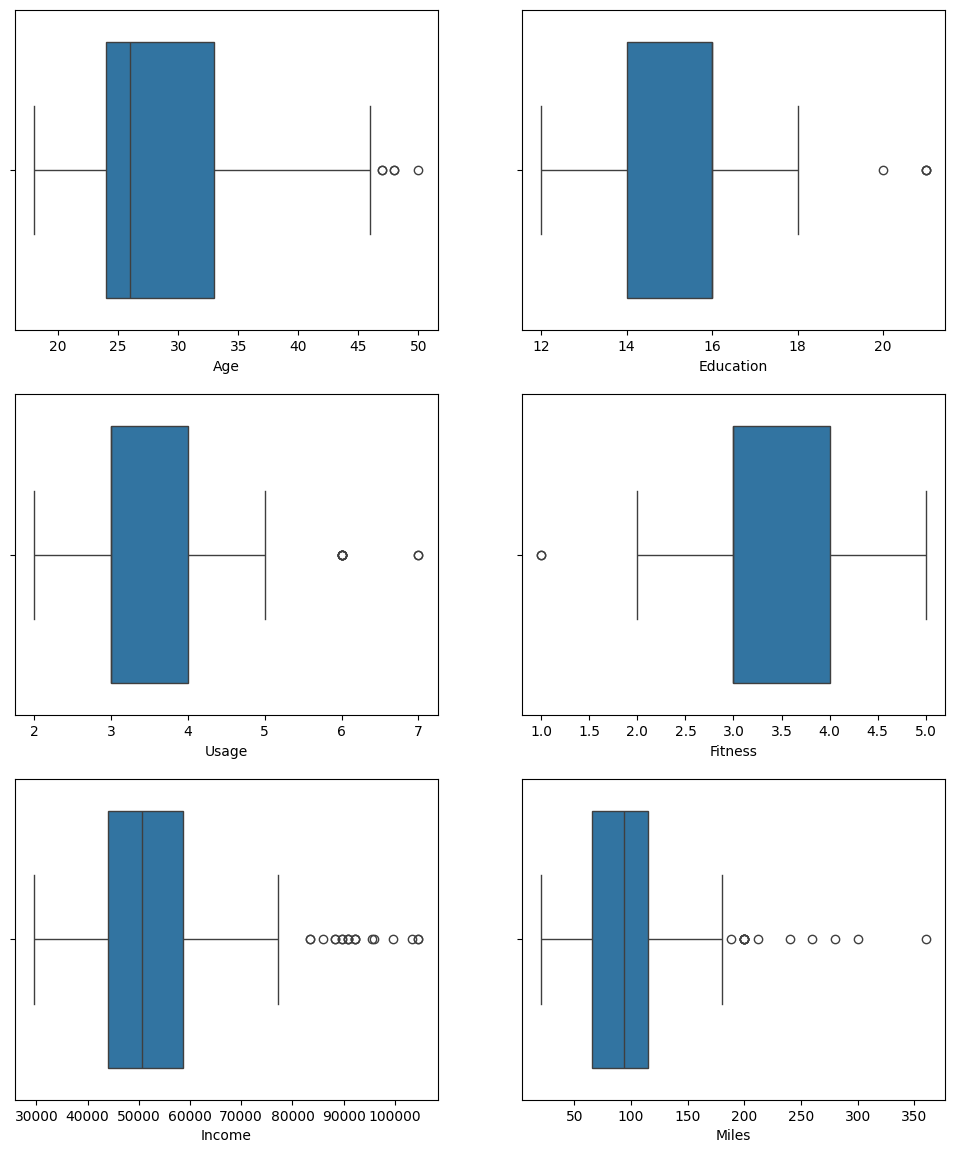

In [21]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df_aero, x="Age", ax=axis[0,0])
sns.boxplot(data=df_aero, x="Education", ax=axis[0,1])
sns.boxplot(data=df_aero, x="Usage",  ax=axis[1,0])
sns.boxplot(data=df_aero, x="Fitness", ax=axis[1,1])
sns.boxplot(data=df_aero, x="Income",  ax=axis[2,0])
sns.boxplot(data=df_aero, x="Miles",  ax=axis[2,1])
plt.show()

Observations:
 - As we mentioned above due to high standard deviation, we can see that the Income and Miles have more outliers.
 - Age, Education, Usage and Fitness are normally distributed and less outliers.

Understanding the Categorical attributes:
  - Products
  - Gender
  - MaritalStatus

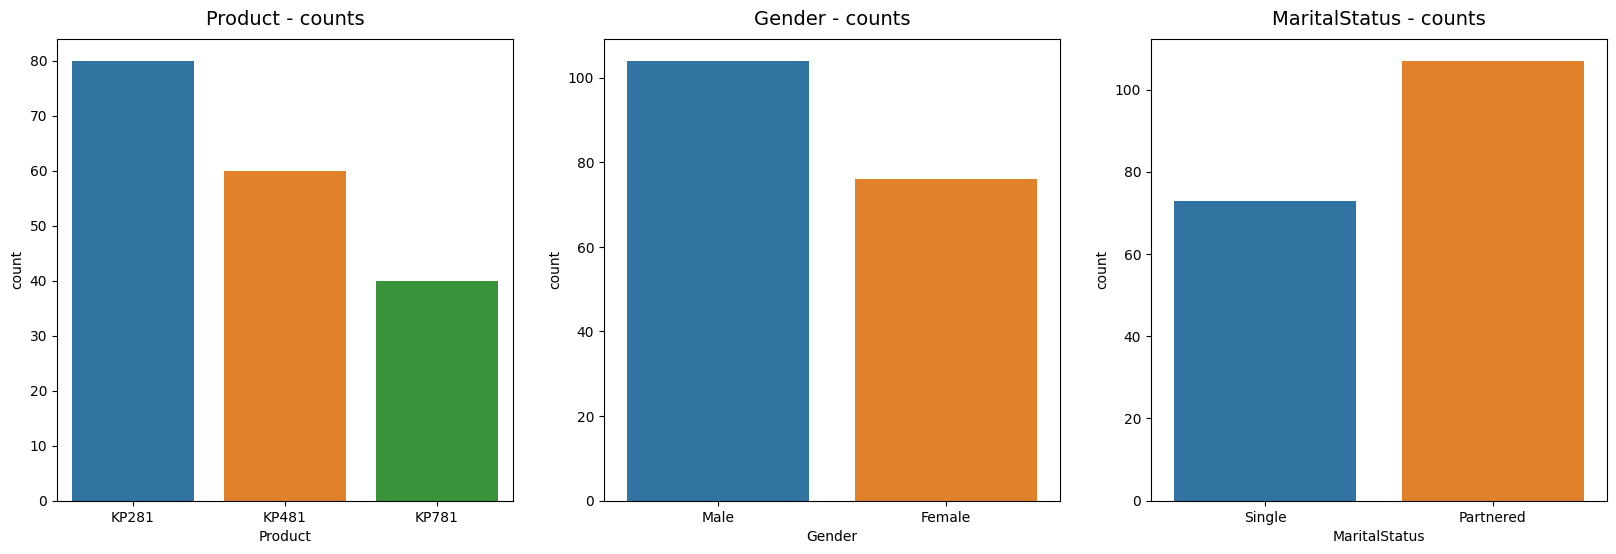

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df_aero, x='Product', ax=axs[0],hue='Product')
sns.countplot(data=df_aero, x='Gender', ax=axs[1], hue='Gender')
sns.countplot(data=df_aero, x='MaritalStatus', ax=axs[2], hue='MaritalStatus')

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

Obervations
 - KP281 is the most frequent product.
 - Thare are more Males in the data than Females.
 - More Partnered persons are there in the data.

## Bivariate Analysis

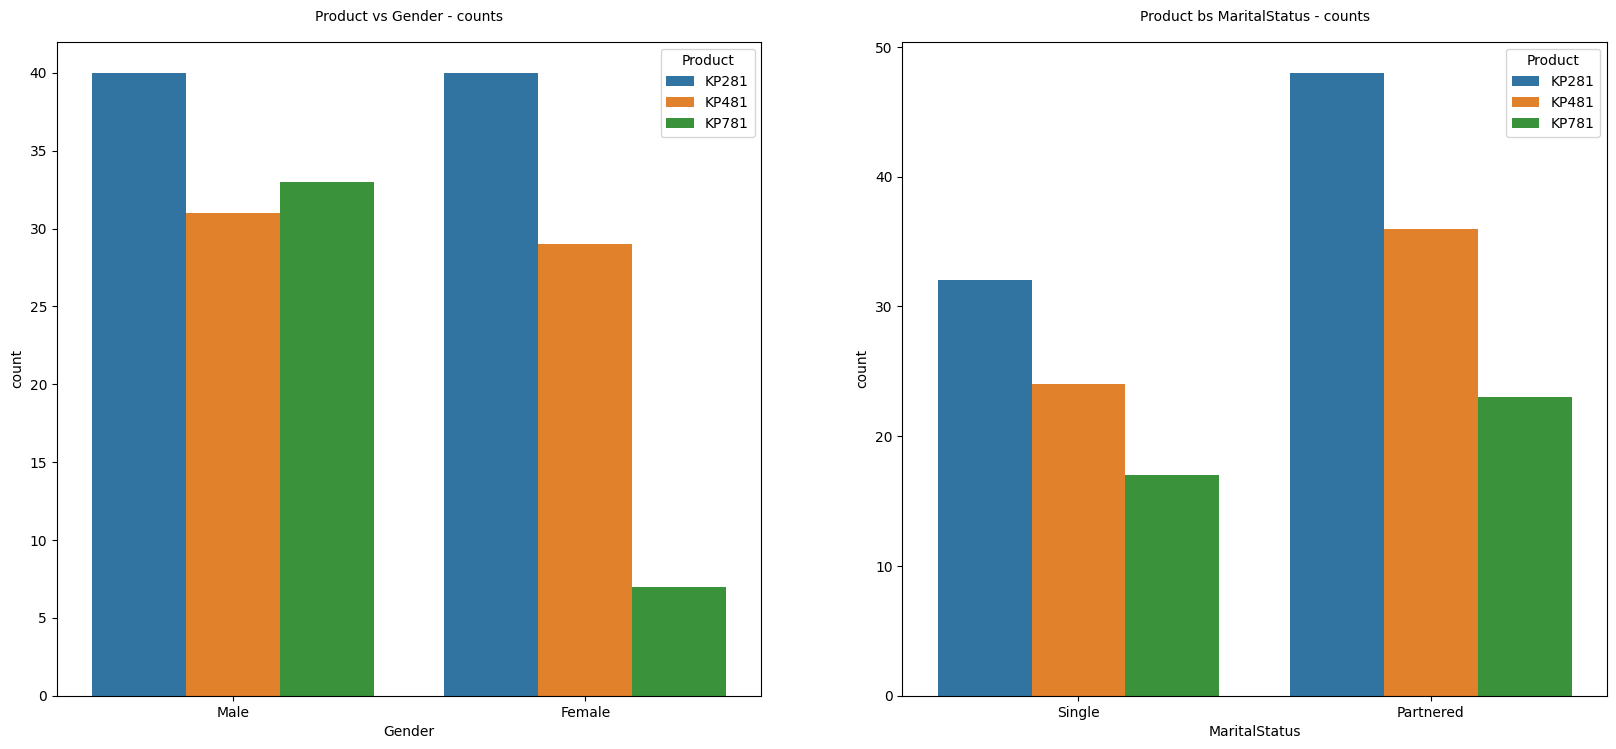

In [39]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.2, hspace=0.5)

sns.countplot(x=df_aero['Gender'],data=df_aero,hue=df_aero['Product'], ax=axis[0])
sns.countplot(x=df_aero['MaritalStatus'], data=df_aero,hue=df_aero['Product'], ax=axis[1])

axis[0].set_title("Product vs Gender - counts", pad=15, fontsize=10)
axis[1].set_title("Product bs MaritalStatus - counts", pad=15, fontsize=10)


plt.show()

Obervations
 - Product vs Gender
    - Equal number of males and females have purchased KP281 product and Almost same for the product KP481
    - Most of the Male customers have purchased the KP781 product.
  - Product vs MaritalStatus
    - Customer who is Partnered, is more likely to purchase the product.

Checking the effect of numerical attributes on the Product variable.
 - Age vs Product
 - Education vs Product
 - Usage vs Product
 - Fitness vs Product
 - Income vs Product
 - Miles vs Product

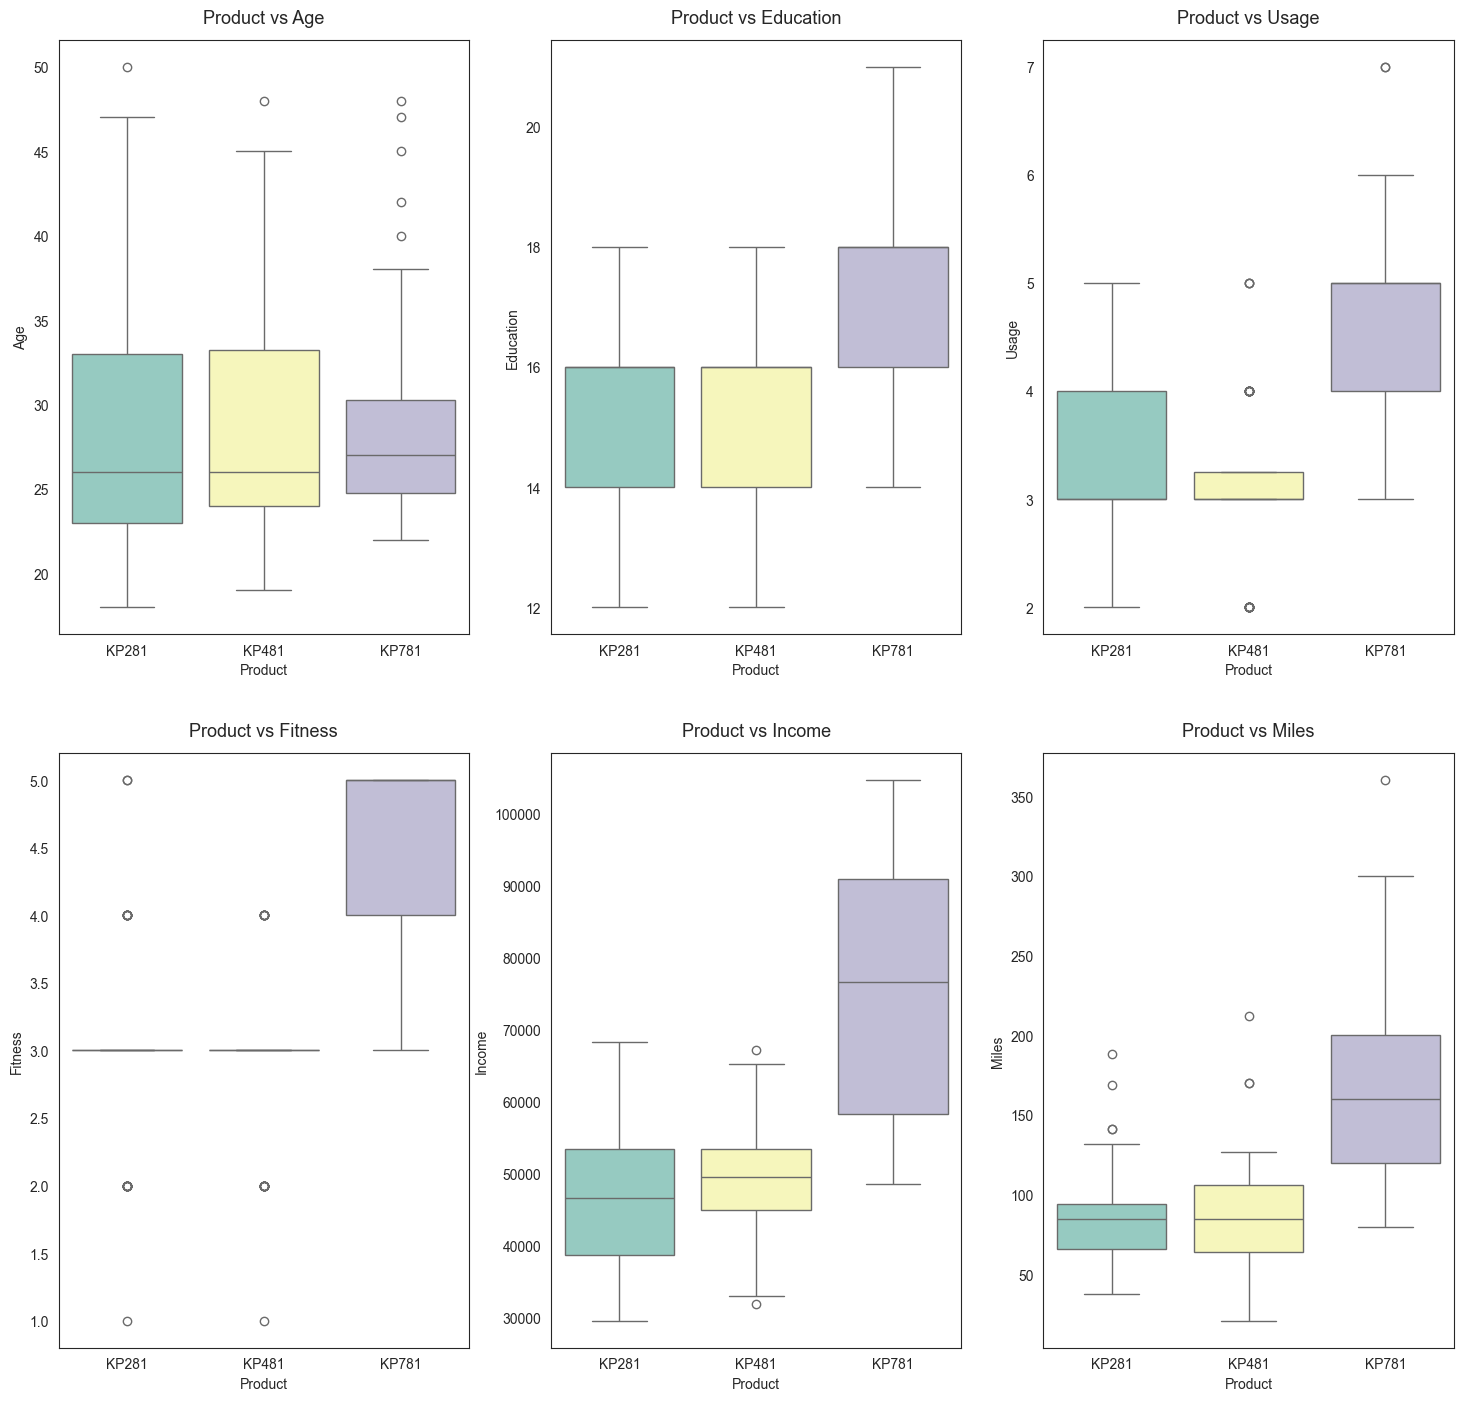

In [43]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df_aero, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3', hue='Product')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

- Product vs Age
  - Customers purchasing products KP281 & KP481 are having same Age median value.
  - Customers whose age lies between 25-30, are more likely to buy KP781 product
- Product vs Education
  - Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
  - While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
- Product vs Usage
  - Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
  - While the other customers are likely to purchasing KP281 or KP481.
- Product vs Fitness
  - The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
- Product vs Income
  - Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
Product vs Miles
  - If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

## Correlation between Variables

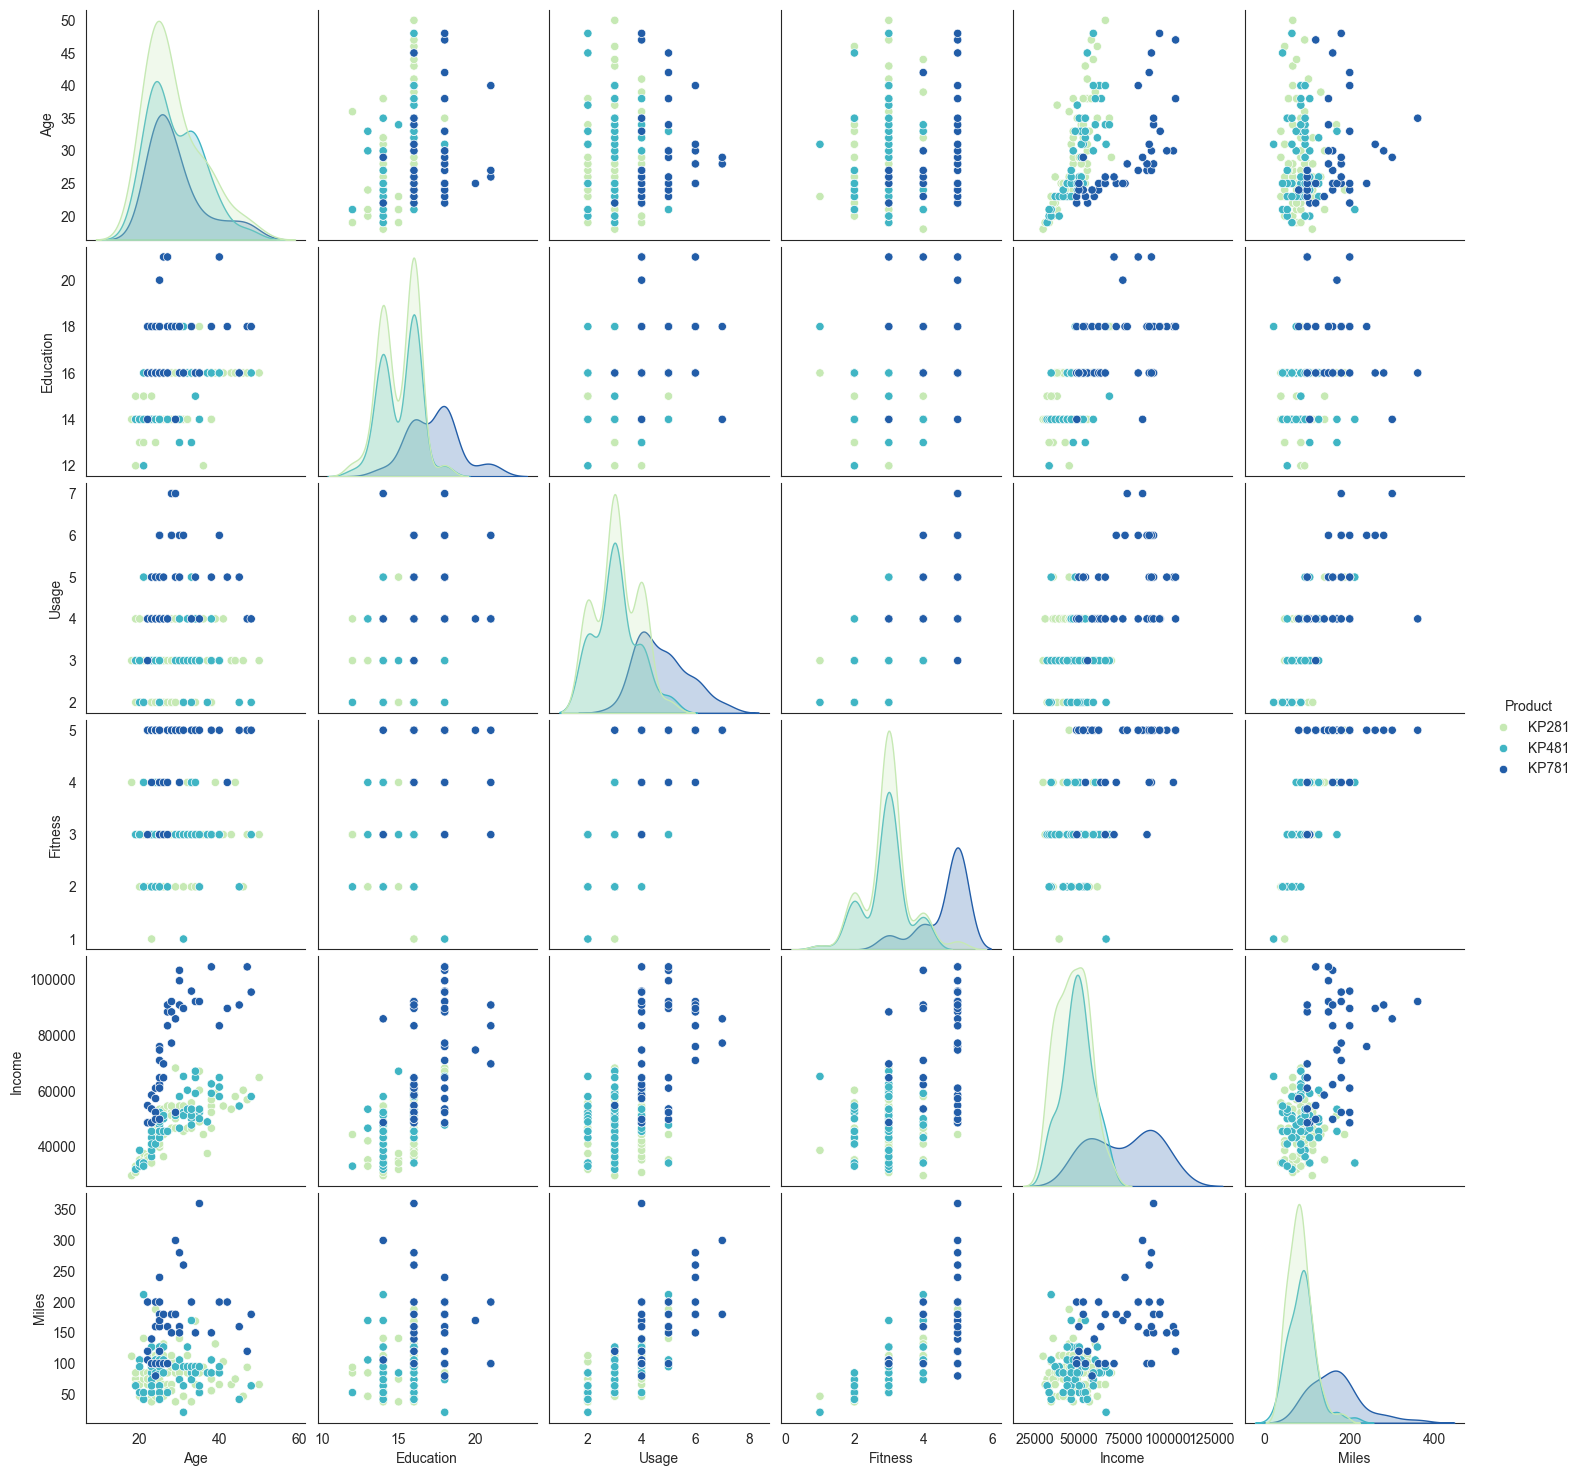

In [52]:
df_copy = df_aero.copy(deep=True)
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

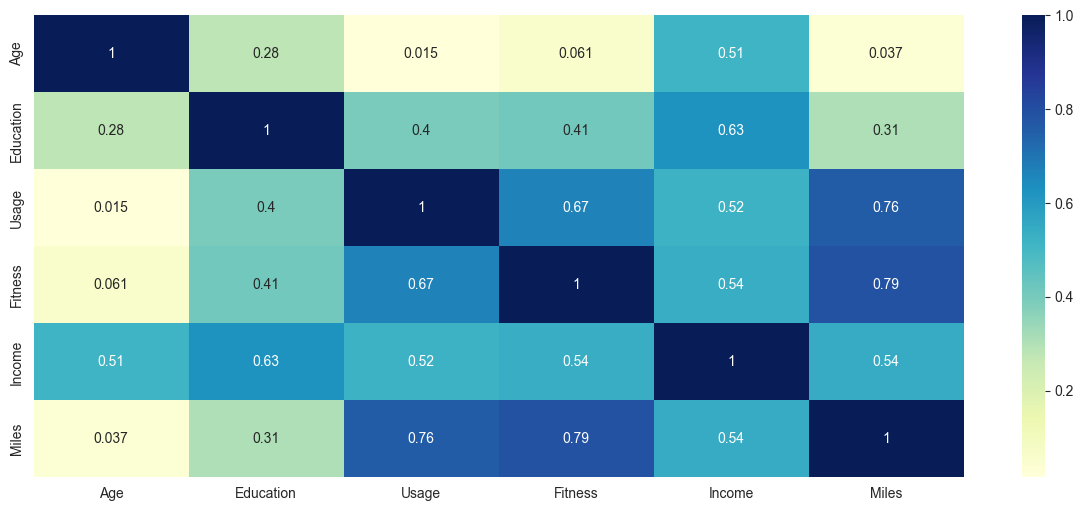

In [54]:
df_copy = df_aero.select_dtypes(include='int64')
corr_mat = df_copy.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")
plt.show()

Observations 
  - From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
  - Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
  - Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage

# Computing Probability - Marginal, Conditional Probability

In [63]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df_aero['age_group'] = pd.cut(df_aero['Age'],bins = bin_range1,labels = bin_labels1)
#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df_aero['edu_group'] = pd.cut(df_aero['Education'],bins = bin_range2,labels = bin_labels2)
#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df_aero['income_group'] = pd.cut(df_aero['Income'],bins = bin_range3,labels = bin_labels3)
#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df_aero['miles_group'] = pd.cut(df_aero['Miles'],bins = bin_range4,labels = bin_labels4)

df_aero.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


In [77]:
df1 = df_aero[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df_aero)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Observations:

**Product:**
- 44.44% of the customers have purchased the KP281 product.
- 33.33% of the customers have purchased the KP481 product.
- 22.22% of the customers have purchased the KP781 product.

**Gender:**
- 57.78% of the customers are male.

**Marital Status:**
- 59.44% of the customers are partnered.

These observations provide insights into the distribution of purchases among different products, genders, and marital statuses. They can help in understanding customer preferences and behavior, which can be valuable for marketing and product development strategies.

### Probability of a customer purchasing a product w.r.t to gender

In [55]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### Insights

1. **Probability of Treadmill Purchase by Gender:**
   - **Female:** 42%
   - **Male:** 58%

2. **Conditional Probability of Treadmill Purchase by Gender:**

   - **Female Customers:**
     - KP281: 22%
     - KP481: 16%
     - KP781: 4%

   - **Male Customers:**
     - KP281: 22%
     - KP481: 17%
     - KP781: 18%

### Probability of a customer purchasing a product w.r.t to marital status

In [56]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


### Insights

1. **Probability of Treadmill Purchase by Marital Status:**
   - **Partnered:** 59%
   - **Single:** 41%

2. **Conditional Probability of Treadmill Purchase by Marital Status:**
   - **Partnered Customers:**
     - KP281: 27%
     - KP481: 20%
     - KP781: 13%

   - **Single Customers:**
     - KP281: 17%
     - KP481: 13%
     - KP781: 10%


### Probability of a customer purchasing a product w.r.t to income

In [64]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


### Insights

1. **Probability of Treadmill Purchase by Income Level:**
   - **Low Income (<40k):** 18%
   - **Moderate Income (40k - 60k):** 59%
   - **High Income (60k - 80k):** 13%
   - **Very High Income (>80k):** 11%

2. **Conditional Probability of Treadmill Purchase by Income Level:**
   - **Low Income (<40k):**
     - KP281: 13%
     - KP481: 5%
     - KP781: 0%

   - **Moderate Income (40k - 60k):**
     - KP281: 28%
     - KP481: 24%
     - KP781: 6%

   - **High Income (60k - 80k):**
     - KP281: 3%
     - KP481: 4%
     - KP781: 6%

   - **Very High Income (>80k):**
     - KP281: 0%
     - KP481: 0%
     - KP781: 11%


### Probability of a customer purchasing a product w.r.t to usage

In [65]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


### Insights

1. **Probability of Treadmill Purchase by Weekly Usage:**
   - **Usage 2 per week:** 18%
   - **Usage 3 per week:** 38%
   - **Usage 4 per week:** 29%

2. **Conditional Probability of Treadmill Purchase by Weekly Usage:**
   - **Usage 2 per week:**
     - KP281: 11%
     - KP481: 8%
     - KP781: 0%

   - **Usage 3 per week:**
     - KP281: 21%
     - KP481: 17%
     - KP781: 1%

   - **Usage 4 per week:**
     - KP281: 12%
     - KP481: 7%
     - KP781: 10%


### Probability of a customer purchasing a product w.r.t to fitness

In [67]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


### Insights

1. **Probability of Treadmill Purchase by customer with Fitness:**
   - **Fitness 2,3,4,5:** 15%(almost)
   - **Fitmess 3 :** 54%
   - **Fitness 1:** 1%

2. **Conditional Probability of Treadmill Purchase by customer with Fitness:**
   - **Fitness 3:**
     - KP281: 30%
     - KP481: 22%
     - KP781: 2%

### Probability of a customer purchasing a product w.r.t to miles

In [68]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


### Insights

1. **Probability of Treadmill Purchase by Lifestyle:**
   - **Light Activity (0 to 50 miles/week):** 9%
   - **Moderate Activity (51 to 100 miles/week):** 54%
   - **Active Lifestyle (100 to 200 miles/week):** 33%
   - **Fitness Enthusiast (>200 miles/week):** 3%

2. **Conditional Probability of Treadmill Purchase by Lifestyle:**
   - **Light Activity (0 to 50 miles/week):**
     - KP281: 7%
     - KP481: 3%
     - KP781: 0%

   - **Moderate Activity (51 to 100 miles/week):**
     - KP281: 28%
     - KP481: 22%
     - KP781: 4%

   - **Active Lifestyle (100 to 200 miles/week):**
     - KP281: 10%
     - KP481: 8%
     - KP781: 15%

   - **Fitness Enthusiast (>200 miles/week):**
     - KP281: N/A
     - KP481: N/A
     - KP781: N/A


### Probability of a customer purchasing a product w.r.t to Age

In [69]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


### Insights

1. **Probability of Treadmill Purchase by Age Group:**
   - **Young Adult (18-25):** 44%
   - **Adult (26-35):** 41%
   - **Middle Aged (36-45):** 12%
   - **Elder (Above 45):** 3%

2. **Conditional Probability of Treadmill Purchase by Age Group:**
   - **Young Adult (18-25):**
     - KP281: 19%
     - KP481: 16%
     - KP781: 9%

   - **Adult (26-35):**
     - KP281: 18%
     - KP481: 13%
     - KP781: 9%

   - **Middle Aged (36-45):**
     - Not provided

   - **Elder (Above 45):**
     - Not provided

These probabilities suggest that young adults (18-25) and adults (26-35) are more likely to purchase a treadmill compared to middle-aged and elderly individuals. The choice of treadmill model also varies among age groups, with different models being more popular among different age groups.

### Probability of a customer purchasing a product w.r.t to Education

In [70]:
pd.crosstab(index =df_aero['Product'],columns = df_aero['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


### Insights

1. **Probability of Treadmill Purchase by Education Level:**
   - **Primary Education (0 to 12 years):** 2%
   - **Secondary Education (13 to 15 years):** 36%
   - **Higher Education (Above 15 years):** 62%

2. **Conditional Probability of Treadmill Purchase by Education Level:**
   - **Primary Education (0 to 12 years):**
     - KP281: N/A
     - KP481: N/A
     - KP781: N/A

   - **Secondary Education (13 to 15 years):**
     - KP281: 21%
     - KP481: 14%
     - KP781: 1%

   - **Higher Education (Above 15 years):**
     - KP281: 23%
     - KP481: 18%
     - KP781: 21%


# Customer Profiling

1. **KP281 Treadmill:**
   - **Age:** Mainly between 18 to 35 years with few between 35 to 50 years
   - **Education Level:** 13 years and above
   - **Annual Income:** Below USD 60,000
   - **Weekly Usage:** 2 to 4 times
   - **Fitness Scale:** 2 to 4
   - **Weekly Running Mileage:** 50 to 100 miles

2. **KP481 Treadmill:**
   - **Age:** Mainly between 18 to 35 years with few between 35 to 50 years
   - **Education Level:** 13 years and above
   - **Annual Income:** Between USD 40,000 to USD 80,000
   - **Weekly Usage:** 2 to 4 times
   - **Fitness Scale:** 2 to 4
   - **Weekly Running Mileage:** 50 to 200 miles

3. **KP781 Treadmill:**
   - **Gender:** Male
   - **Age:** Between 18 to 35 years
   - **Education Level:** 15 years and above
   - **Annual Income:** USD 80,000 and above
   - **Weekly Usage:** 4 to 7 times
   - **Fitness Scale:** 3 to 5
   - **Weekly Running Mileage:** 100 miles and above


# Recommendations
  1. **Marketing Strategy:**
     - Targeted marketing campaigns should be designed to attract young adults and adults, especially those with higher education and moderate income levels.
     - Product KP781 should be marketed for more females as product is popular among males but not in females.
     - - The company should also focus on low fitness level customer because they can be the potential customers for the future, if they advertise there product correctly.
  2. **Product Development:**
     - The company should focus on developing more advanced and high-end treadmills to cater to the needs of fitness enthusiasts with higher income levels.
     - The company should also consider developing more affordable models for customers with moderate income levels.
   3. **Customer Engagement:**
      - The company should engage with customers to understand their needs and preferences, and use this information to improve existing products and develop new ones.
      - The company should also provide personalized recommendations and offers to customers based on their demographics, usage patterns, and fitness levels
   4. **Sales Strategy:**
       - The company should focus on customer with low income and moderate fitness level as they are the potential customers for the future.
       -  The company should also focus on the customers who are using the treadmill 2-3 times a week as they are the potential customers for the future.
       - The company also need to understand there regular customer so they can recommend the product to other users and it saves comapny's marketing cost.
     